## Complex numbers: Introduction
### شماره‌های پیجیده: آشنایی
By Hamed Shah-Hosseini
<br>The whole code:
    https://github.com/ostad-ai/Computer-Science
<br> Description in English:
https://www.pinterest.com/HamedShahHosseini/computer-science/background-knowledge/

In [1]:
from math import sin,cos,pi,e,sqrt,atan2
from cmath import polar,rect
from matplotlib import pyplot as plt

In [2]:
# define complex numbers: by literal, by complex()
z1=3+5j
z2=complex(3,5)
if z1==z2:
    print('3+5j is equal to complex(3,5)')

3+5j is equal to complex(3,5)


Arithmetic operators +,-,*,/, and ** support complex numbers too

In [3]:
#arithmetic with complex numbers
z1=2+5j; z2=3+4j
print(f'Numbers:{z1},{z2}')
print(f'Addition:{z1+z2}')
print(f'Subtraction:{z1-z2}')
print(f'Multiplication:{z1*z2}')
print(f'Division:{z1/z2}')
print(f'power,z1^2:{z1**2}')

Numbers:(2+5j),(3+4j)
Addition:(5+9j)
Subtraction:(-1+1j)
Multiplication:(-14+23j)
Division:(1.04+0.28j)
power,z1^2:(-21+20j)


For complex number $z=x+iy$, the real part is $x$, and the imaginary part is $y$
<br> The conjugate of z is the complex number $z_{conjugate}=x-iy$

In [4]:
# real, imaginary, and conjugte 
z=8+3j; z_conj=z.conjugate()
print(f'Original: {z}. Its real: {z.real}, imaginary:{z.imag}')
print(f'Conjugate:{z_conj}. Its real: {z_conj.real}, imaginary:{z_conj.imag}')

Original: (8+3j). Its real: 8.0, imaginary:3.0
Conjugate:(8-3j). Its real: 8.0, imaginary:-3.0


A point $z=x+iy$ can be represented in polar coordinates:
<br> $x=r\; cos\theta$, $y=r\; sin\theta$
<br> where modulus of $z$, $r$, is computed by: $r=\sqrt{x^2+y^2}$; and argument of $z$, $\theta$, is obtained from: $tan\theta=\frac{y}{x}$
<br> As a result point $z=x+iy$ can be written in polar form as: $z=r(cos\theta+isin\theta)$
<br> In practice, we use $atan2$ instead of $atan$ in Python.

In [5]:
z=2+5j; r,teta=polar(z)
print(f'{z} to polar: {r:.3f},{teta:.3f}')

(2+5j) to polar: 5.385,1.190


In [6]:
# we could use polar() and rect() from module cmath
# from cmath import polar,rect
# r,teta=polar(z)
#z_rect=rect(r,teta)
#polar from scratch
def to_polar(z):
    x,y=z.real,z.imag
    r=sqrt(x**2+y**2) # could use r=abs(z)
    teta=atan2(y,x)
    return r,teta

#rect from scratch
def to_rect(r,teta):
    x=r*cos(teta)
    y=r*sin(teta)
    return complex(x,y)

z=3+5j
r,teta=to_polar(z)
z_rect=to_rect(r,teta)
print(f'z={z} to polar form: (r={r:.3f},teta={teta:.3f})')
print(f'z=({r:.3f},{teta:.3f}) to rectangular form: z={z_rect:.2f}')

z=(3+5j) to polar form: (r=5.831,teta=1.030)
z=(5.831,1.030) to rectangular form: z=3.00+5.00j


**Multiplication in polar forms:**
For two complex numbers: 
<br>$z_1=r_1(cos\theta_1+i\,sin\theta_1)$
<br>$z_2=r_2(cos\theta_2+i\,sin\theta_2)$
<br> we can show that their multiplication:
<br>$z_1z_2=r_1r_2(cos(\theta_1+\theta_2)+i\,sin(\theta_1+\theta_2))$

In [7]:
# multiplication in polar forms from scratch
def cmult(z1,z2,format='rect'):
    r1,teta1=polar(z1); r2,teta2=polar(z2)
    r,teta=r1*r2,teta1+teta2
    if format=='rect': return rect(r,teta)
    else: return r,teta
z1,z2=5+2j,4+6j
print(f'With operator *:  z1*z2={z1*z2:.3f}')
print(f'With polar forms: z1*z2={cmult(z1,z2):.3f}')

With operator *:  z1*z2=8.000+38.000j
With polar forms: z1*z2=8.000+38.000j


From multiplication in polar form, we can prove that for $z=r(cos\theta+isin\theta)$ we can get the nth power by:
<br>$z^n=r^n(cos\,n\theta+isin\,n\theta)$ for $n=0,\pm1,\pm2,...$
<br> From above we get **De Moivre's formula**:
<br>$(cos\theta+isin\theta)^n=cos\,n\theta+isin\,n\theta$

In [8]:
# using De Moivre's formula for powers in interger
def moivre(z,n=2):
    r,teta=polar(z)
    return rect(r**n,n*teta)
z,n=2+3j,3
print(f'Power: {z**n},{moivre(z,n):.3f}')

Power: (-46+9j),-46.000+9.000j


Multiplication in complex plane is like  a rotation. Having numbers $z_1$ and $z_2$:
<br>$z_1=r_1(cos\theta_1+i\,sin\theta_1)$
<br>$z_2=r_2(cos\theta_2+i\,sin\theta_2)$
<br>Their product is like getting point $z_1$ rotated by angle $\theta_2$ around origin:
<br>$z_1z_2=r_1r_2(cos(\theta_1+\theta_2)+i\,sin(\theta_1+\theta_2))$
<br> If we represent $z_1=x_1+iy_1$ and $z_2=x_2+iy_2$ in rectangular forms, their product can be seen as matrix multiplication:<br>
$
    \begin{bmatrix}
    x_2 & -y_2\\
    y_2 & x_2\\    
  \end{bmatrix}
  \begin{bmatrix}
  x_1\\y_1
  \end{bmatrix}
  =\begin{bmatrix}
  x_1x_2-y_1y_2\\
  x_1y_2+x_2y_1
  \end{bmatrix}
$
<br>The matrix on the left side may be viewed as a rotation matrix.

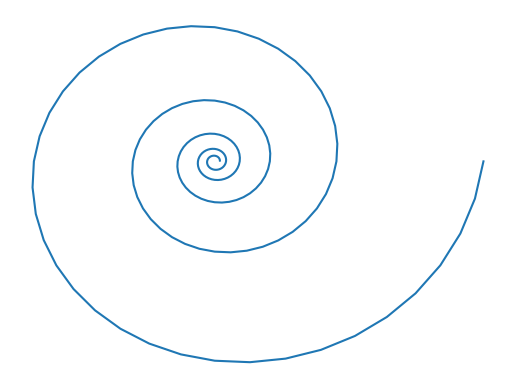

In [9]:
# example of multiplication as rotation

def spiral(z,N=200,rot=(1.02,pi/20)):
    zs=[]; r,teta=rot[0],rot[1]
    z_rot=r*complex(cos(teta),sin(teta))
    for n in range(N):
        z*=z_rot; zs.append([z.real,z.imag])
    return zs
z0=.001; xs,ys=zip(*spiral(z0))
plt.plot(xs,ys,'-')
plt.axis('off'); plt.show()

Multiplication in polar form:
Again we hve numbers $z_1$ and $z_2$:
<br>$z_1=r_1(cos\theta_1+i\,sin\theta_1)$
<br>$z_2=r_2(cos\theta_2+i\,sin\theta_2)$
<br>Then ,we can show that:
<br>$\left|\frac{z_1}{z_2}\right|=\frac{\left|z_1 \right|}{\left|z_2 \right|}$ 
and $arg\frac{z_1}{z_2}=arg z_1-arg z_2$
<br>Thus, the divison in polar form becomes:
<br>$\frac{z_1}{z_2}=\frac{r_1}{r_2}(cos(\theta_1-\theta_2)+i\,sin(\theta_1-\theta_2))$

In [10]:
# division in polar forms from scratch
def cdiv(z1,z2,format='rect'):
    r1,teta1=polar(z1); r2,teta2=polar(z2)
    r,teta=r1/r2,teta1-teta2
    if format=='rect': return rect(r,teta)
    else: return r,teta
z1,z2=5+2j,4+6j
print(f'With operator /: z1/z2={z1/z2:.3f}')
print(f'With polar form: z1/z2={cdiv(z1,z2):.3f}')

With operator /: z1/z2=0.615-0.423j
With polar form: z1/z2=0.615-0.423j


Euler's formula says that for any real number $\theta$, we have:
<br> $e^{i\theta}=cos\theta+i\,sin\theta$
<br>Thus, complex number $z=r(cos\theta+ i\,sin\theta)$ in polar form can be written as:
<br> $z=re^{i\theta}$

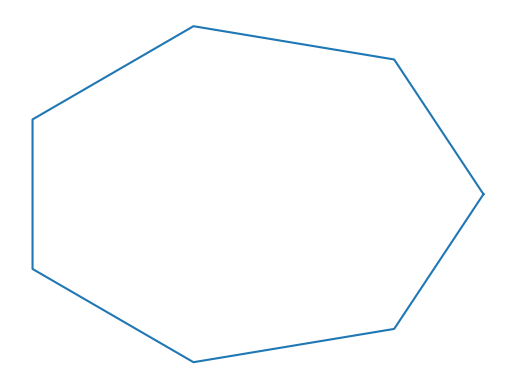

In [11]:
zs=[];N=7
for k in range(N):
    z=e**(2j*pi*k/N)
    zs.append((z.real,z.imag))
zs.append(zs[0]); xs,ys=zip(*zs)
plt.plot(xs,ys,'-')
plt.axis('off');plt.show()